### Feature Engineering: Date and Time
Date and time variable can contain: 1. Date and Time 2. Date  3. Time

Challenges for working date and time variable as a categorical variable:
1. Date variable contains huge number of individual categories and will increase the number of features
2. Date variable provides meaningful insight when processed in the right way

Additional details:
In most scenario, Dates present in the Date variable used to train machine learning algorithm might not be conatining the same date (Dates with respect to future aspect) in the test data.

### Loan dataset example to show the processing of the date variable

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# loading the dataset with a few selected columns
use_cols = ['loan_amnt','grade','purpose','issue_d', 'last_pymnt_d']
data = pd.read_csv('loan.csv',usecols=use_cols)
data.head()

,loan_amnt,grade,issue_d,purpose,last_pymnt_d
0,2500,C,Dec-2018,debt_consolidation,Feb-2019
1,30000,D,Dec-2018,debt_consolidation,Feb-2019
2,5000,D,Dec-2018,debt_consolidation,Feb-2019
3,4000,D,Dec-2018,debt_consolidation,Feb-2019
4,30000,C,Dec-2018,debt_consolidation,Feb-2019


In [5]:
# Inspect pandas type of object used to store the information
data.dtypes

loan_amnt        int64
grade           object
issue_d         object
purpose         object
last_pymnt_d    object
dtype: object

In [9]:
# Parese the dates,currently loaded as object into datetime format and will allow to make analysis
data['issue_dt'] = pd.to_datetime(data.issue_d)
data['last_pymnt_dt'] = pd.to_datetime(data.last_pymnt_d)

data[['issue_d','issue_dt','last_pymnt_d','last_pymnt_dt']].head()

,issue_d,issue_dt,last_pymnt_d,last_pymnt_dt
0,Dec-2018,2018-12-01,Feb-2019,2019-02-01
1,Dec-2018,2018-12-01,Feb-2019,2019-02-01
2,Dec-2018,2018-12-01,Feb-2019,2019-02-01
3,Dec-2018,2018-12-01,Feb-2019,2019-02-01
4,Dec-2018,2018-12-01,Feb-2019,2019-02-01


Text(0, 0.5, 'Disbursed amount (US Dollars)')

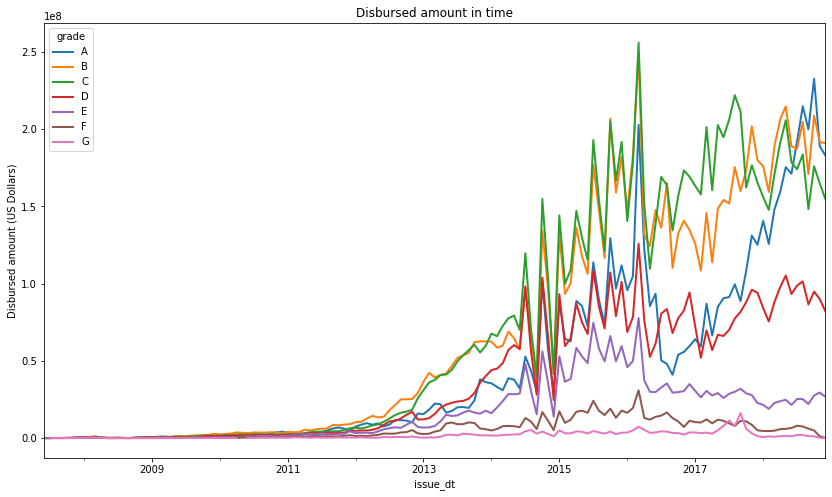

In [12]:
# Let's compare  how much load has provoided year on year for different risk criteria

fig = data.groupby(['issue_dt','grade'])['loan_amnt'].sum().unstack().plot(
                   figsize=(14,8), linewidth=2)
fig.set_title('Disbursed amount in time')
fig.set_ylabel('Disbursed amount (US Dollars)')

1. Bank started providing more loan amount from 2013 and it is showing the positive growth.
2. Major business is coming from grade B and C

A grade low risk and the borrower usually returns the money. E, F and G grades represents risk borrowers.
